In [ ]:
#!pip install getpass4 jupyter_ai~=1.0 openai gseapy

### **Configuring OpenAI API keys**

In [1]:
import os
import openai
from getpass import getpass
api_key = getpass("Enter your OpenAI key: ") #https://platform.openai.com/api-keys
os.environ['OPENAI_API_KEY'] = api_key

Enter your OpenAI key:  ········


### **Setting up Jupyter copilot**

In [2]:
%load_ext jupyter_ai

In [3]:
%%ai openai-chat:gpt-3.5-turbo
Write a short poem about chatgpt

# ChatGPT

In the realm of AI's glory,
A digital mind tells its story.
ChatGPT, the conversational guide,
With language prowess, deep and wide.

Questions posed, answers unfold,
A symphony of words, untold.
It understands, it empathizes,
Through virtual conversations, it mesmerizes.

From topics silly to those profound,
ChatGPT's knowledge, truly renowned.
Art, science, or tales of yore,
It responds with wisdom and so much more.

With every interaction, it learns anew,
Adapting, evolving, just for you.
A companion in the digital sphere,
ChatGPT, a friend so dear.

But remember, dear user, with caution tread,
For AI's limits lie ahead.
In its brilliance, it's still a machine,
ChatGPT, a marvel yet to be seen.

In [4]:
%%ai openai-chat:gpt-3.5-turbo -f code
Genereate a function to add two numbers. Then print out the sum of 2 and 3.

In [5]:
def add_numbers(a, b):
    return a + b

print(add_numbers(2, 3))

5


In [6]:
%%ai openai-chat:gpt-3.5-turbo --format code
Create a function that plots a circle of radius r. Then plot the circle with r=4.

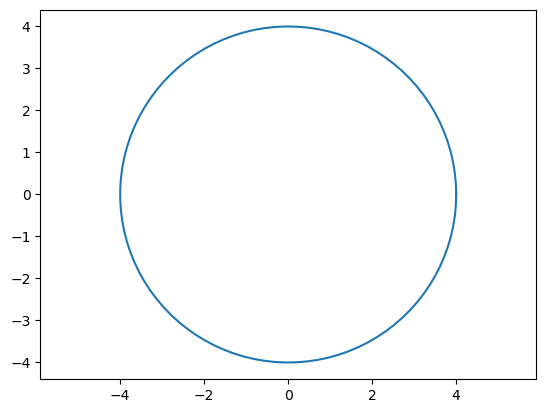

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot_circle(radius):
    theta = np.linspace(0, 2*np.pi, 100)
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    plt.plot(x, y)
    plt.axis('equal')
    plt.show()

plot_circle(4)

### **Let's begin, we will load our dataset now**

In [10]:
import pandas as pd
gene_exp = pd.read_csv('Workshop_Data.csv',index_col=0)
gene_exp.head()

,ENTPD4,PPM1E,ANKRD34C,PRR16,LONP1,LPA,DALRD3,ZNF705G,SMAD6,ATF6,...,NR2F2,AS3MT,PCDH11Y,FAM124B,ASH2L,PCED1B,CA1,ZBTB22,CBLL1,Clinical_status
7316-101,3.432311,2.672589,0.341457,1.711063,4.543091,0.386900,3.165207,0.019529,1.137224,2.621226,...,3.917738,1.208563,3.630702,0.633061,3.721078,1.755051,0.233654,3.259843,3.222730,GNG
7316-120,3.339354,2.435612,0.047633,1.092421,3.917665,0.160108,2.281124,-0.102926,0.960577,3.336697,...,2.774818,2.004762,-0.060282,0.768917,3.836300,1.520004,0.361742,2.830646,3.457789,GNG
7316-156,3.219657,0.811430,0.265461,0.943533,5.676209,0.322045,3.316833,0.265461,2.164637,2.976956,...,3.498122,1.874270,0.279816,0.552342,3.709068,2.781476,0.467095,3.301085,3.316833,GNG
7316-1793,4.007827,2.650892,0.078530,0.331072,4.220304,0.040395,2.523059,-0.123104,1.277434,3.567313,...,2.933479,1.163777,-0.123104,0.509164,3.730892,2.601546,0.221724,2.999569,3.697585,GNG
7316-1854,3.431670,2.272258,0.210982,0.869548,4.122634,0.033586,2.865766,-0.064025,1.363581,3.050342,...,1.943171,1.701510,2.643058,0.347401,3.555388,1.263662,0.112298,3.129747,3.603867,GNG


#### **Differentially expressed genes using t test between the two clinical conditions given the data is normalized** 

In [11]:
%%ai openai-chat:gpt-3.5-turbo --format code
You are a bioinformatician, having experience with python programming language. You are given a gene expression data where each is a  
sample and each column is gene expression value. The last column is Clinical_status which is a categorical variable with classes GNG and MBL. 
Design a function to perform t-test between the two classes for each gene, and return the results as a dataframe with t-statistic and p-value
in columns. 

In [32]:
import pandas as pd
from scipy import stats

def perform_t_test(data):
    t_statistic = []
    p_value = []
    genes = data.columns[:-1]  # Exclude the last column (Clinical_status)
    for gene in genes:
        group1 = data[data['Clinical_status'] == 'GNG'][gene]
        group2 = data[data['Clinical_status'] == 'MBL'][gene]
        t, p = stats.ttest_ind(group1, group2)
        t_statistic.append(t)
        p_value.append(p)
    results = pd.DataFrame({'Gene': genes, 'T-Statistic': t_statistic, 'P-Value': p_value})
    return results

# Example usage
t_test_results = perform_t_test(data = gene_exp)
t_test_results.head()

,Gene,T-Statistic,P-Value
0,ENTPD4,1.929813,0.062535
1,PPM1E,2.654832,0.012261
2,ANKRD34C,2.050770,0.048553
3,PRR16,2.664717,0.011971
4,LONP1,0.300681,0.765602


In [15]:
%%ai openai-chat:gpt-3.5-turbo --format code
Update the previous function to calculate the logfc values for MBL vs GNG for each gene.

In [ ]:
import math

def calculate_logfc(data):
    logfc_values = {}
    
    for gene, values in data.items():
        mbl_value = values['MBL']
        gng_value = values['GNG']
        
        logfc = math.log2(mbl_value / gng_value)
        logfc_values[gene] = logfc
    
    return logfc_values

#### **Differentially expressed genes with t-test and log fold change calculation**

In [23]:
%%ai openai-chat:gpt-3.5-turbo --format code
You are a bioinformatician, having experience with python programming language. You are given a gene expression data where each is a  
sample and each column is gene expression value. The last column is Clinical_status which is a categorical variable with classes 
GNG and MBL. Design a function to perform t-test and the log fold change between the two classes for each gene, and return the results 
as a dataframe with t-statistic and p-value in columns. 

In [37]:
import pandas as pd
import scipy.stats as stats

def perform_t_test(data):
    # Separate the gene expression data and clinical status
    gene_data = data.iloc[:, :-1]
    clinical_status = data.iloc[:, -1]
    
    # Initialize an empty dataframe to store results
    #result_df = pd.DataFrame(columns=['Gene', 't-statistic', 'p-value', 'LFC'])
    col_names = ['Gene', 't-statistic', 'p-value', 'LFC']
    results = []
    
    # Iterate over each gene
    for gene in gene_data.columns:
        # Split the gene expression data based on clinical status
        group1 = gene_data[clinical_status == 'GNG'][gene]
        group2 = gene_data[clinical_status == 'MBL'][gene]
        
        # Perform t-test
        t_statistic, p_value = stats.ttest_ind(group1, group2)
        
        # Calculate log fold change
        log_fold_change = group2.mean() - group1.mean()
        
        # Append the result to the dataframe
        results.append([gene, t_statistic, p_value, log_fold_change])
    
    result_df = pd.DataFrame(results, columns=col_names)
    return result_df

# Example usage
t_test_results = perform_t_test(data = gene_exp)
t_test_results.head()

,Gene,t-statistic,p-value,LFC
0,ENTPD4,1.929813,0.062535,-0.213811
1,PPM1E,2.654832,0.012261,-0.812095
2,ANKRD34C,2.050770,0.048553,-0.145653
3,PRR16,2.664717,0.011971,-0.478615
4,LONP1,0.300681,0.765602,-0.067598


#### **Volcano plot**

In [42]:
%%ai openai-chat:gpt-3.5-turbo --format code
Design a python function to build a volcano plot from a dataframe with columns Gene, p-value and LFC. Indicate those genes 
as differentially expressed for which abs(logfc)>1 and p-value<0.05. Also, show upregulated genes in red and downregulated genes
in blue. Do not forget to show all the genes

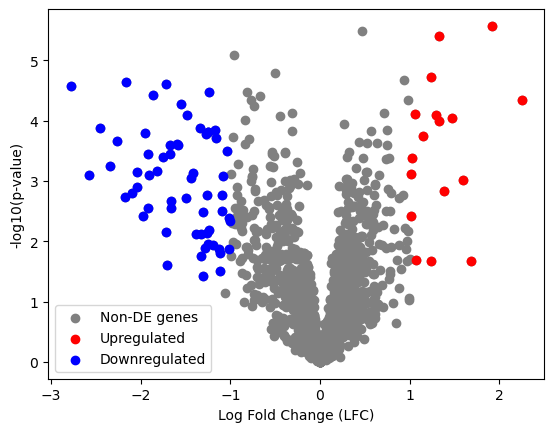

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

def volcano_plot(df):
    # Filter differentially expressed genes
    df_de = df[(abs(df['LFC']) > 1) & (df['p-value'] < 0.05)]
    
    # Plot all genes
    plt.scatter(df['LFC'], -1 * np.log10(df['p-value']), color='gray', label='Non-DE genes')
    
    # Plot upregulated genes in red
    plt.scatter(df_de[df_de['LFC'] > 0]['LFC'], -1 * np.log10(df_de[df_de['LFC'] > 0]['p-value']), color='red', label='Upregulated')
    
    # Plot downregulated genes in blue
    plt.scatter(df_de[df_de['LFC'] < 0]['LFC'], -1 * np.log10(df_de[df_de['LFC'] < 0]['p-value']), color='blue', label='Downregulated')
    
    # Add labels and legend
    plt.xlabel('Log Fold Change (LFC)')
    plt.ylabel('-log10(p-value)')
    plt.legend()
    
    # Show plot
    plt.show()
volcano_plot(t_test_results)

#### **Filetering differentially expressed genes**

In [48]:
%%ai openai-chat:gpt-3.5-turbo --format code
Write a Python function to filter out only the differentially expressed genes froma dataframe with columns Gene, p-value and LFC. 
Genes having abs(LFC)>1 and p-value<0.05 should be considered as differentially expressed.Return the results as a list. Write the 
code using Pandas conditional rules in a single line.

In [50]:
def get_differentially_expressed_genes(df):
    return df[(df['LFC'].abs() > 1) & (df['p-value'] < 0.05)]['Gene'].tolist()
diff_expressed_genes = get_differentially_expressed_genes(t_test_results)
diff_expressed_genes

['DAB2',
 'SYT1',
 'HLA-DOA',
 'RAB3A',
 'PNMA3',
 'RGS6',
 'PTGFRN',
 'TRPM8',
 'PLA2R1',
 'VWA5B2',
 'AP3B2',
 'ZNF536',
 'NAPB',
 'KNDC1',
 'STON1',
 'CTSO',
 'RAB3B',
 'EPHA10',
 'ICAM5',
 'SFRP4',
 'TUBA4A',
 'TMEM132C',
 'PLCH2',
 'MYT1L',
 'TIMP4',
 'ANKRD18A',
 'UNC13A',
 'GALNT13',
 'UNC5D',
 'UST',
 'SYT13',
 'LY6H',
 'ETNPPL',
 'ROGDI',
 'CNDP1',
 'KHDRBS2',
 'RASGRP1',
 'LDB3',
 'HPCAL4',
 'SMIM43',
 'SYTL4',
 'CDH8',
 'CELF3',
 'KALRN',
 'STX1B',
 'SULT4A1',
 'MAPK8IP2',
 'PXDC1',
 'NEFM',
 'PRSS3',
 'SEZ6L2',
 'BTN3A2',
 'CPLX1',
 'FAM153A',
 'LPAR1',
 'RAPGEF4',
 'RPH3A',
 'PGM2L1',
 'EFHD1',
 'HRH3',
 'DUSP8',
 'PTPN5',
 'AMER2',
 'DLGAP2',
 'MARCH4',
 'ABHD2',
 'SEZ6',
 'SNAP25',
 'TUBB3',
 'SPHKAP',
 'PITPNM3',
 'DLG4',
 'TMEM151B',
 'GPR37',
 'GABRB1',
 'COX7A1',
 'CDKL1']

#### **PCA analysis**

In [56]:
%%ai openai-chat:gpt-3.5-turbo --format code
Write a Python function that takes a list of features and dataframe as an input. The dataframe contains features as columns except 
for the last column which is a categorical variable.

First, filter out the columns in the dataframe using the provided list of features. 

Then perform PCA upon the filtered data and visualize the PC_1 and PC_2. Color the samples as per the categorical variable. 

Use Seaborn for visualization

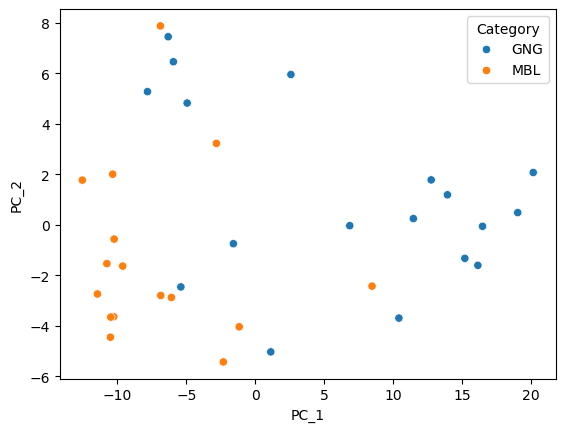

In [68]:
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

def plot_pca(features, data):
    filtered_data = data[features]
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(filtered_data)
    pca_df = pd.DataFrame(data=pca_data, columns=['PC_1', 'PC_2'])
    pca_df['Category'] = list(data.iloc[:, -1])
    sns.scatterplot(data=pca_df, x='PC_1', y='PC_2', hue='Category')
    plt.show()
plot_pca(diff_expressed_genes, gene_exp)

#### **Enrichment analysis**

In [79]:
%%ai openai-chat:gpt-3.5-turbo --format code
Write a Python function to perform enrichment analysis using gseapy package. The inputs to the function 
should be differentially expressed genes. 

In [78]:
def perform_enrichment_analysis(differentially_expressed_genes):
    import gseapy

    # Set up the required inputs for gseapy
    gene_list = differentially_expressed_genes
    gene_sets = 'GO_Biological_Process_2018'
    organism = 'human'
    enrichment_method = 'gseapy.prerank'

    # Perform enrichment analysis
    enr_results = gseapy.enrichr(gene_list=gene_list, gene_sets=gene_sets, organism=organism,
                                )

    return enr_results

# Example usage:
enrichment_results = perform_enrichment_analysis(diff_expressed_genes)
enrichment_results.results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2018,regulation of regulated secretory pathway (GO:...,5/37,2.934856e-07,0.000073,0,0,43.166233,649.282187,RPH3A;RAB3A;SYT1;SYT13;SYTL4
1,GO_Biological_Process_2018,organelle membrane fusion (GO:0090174),6/71,3.135849e-07,0.000073,0,0,25.817551,386.622889,RPH3A;SNAP25;STX1B;SYT1;SYT13;SYTL4
2,GO_Biological_Process_2018,modulation of chemical synaptic transmission (...,6/82,7.414593e-07,0.000115,0,0,22.068569,311.490034,STX1B;UNC13A;SYT1;DLG4;MAPK8IP2;CPLX1
3,GO_Biological_Process_2018,regulation of exocytosis (GO:0017157),5/51,1.516580e-06,0.000129,0,0,30.007548,402.072714,RAB3B;RAB3A;SYT1;SYTL4;CPLX1
4,GO_Biological_Process_2018,chemical synaptic transmission (GO:0007268),9/289,1.656182e-06,0.000129,0,0,9.285032,123.593016,SNAP25;NAPB;GABRB1;UNC13A;SYT1;DLG4;DLGAP2;CPL...
...,...,...,...,...,...,...,...,...,...,...
462,GO_Biological_Process_2018,regulation of cellular macromolecule biosynthe...,1/631,9.156904e-01,0.923601,0,0,0.402945,0.035490,ZNF536
463,GO_Biological_Process_2018,regulation of transcription from RNA polymeras...,3/1478,9.305649e-01,0.936582,0,0,0.507045,0.036489,SFRP4;MYT1L;ZNF536
464,GO_Biological_Process_2018,regulation of cell proliferation (GO:0042127),1/740,9.454506e-01,0.949517,0,0,0.341571,0.019160,SFRP4
465,GO_Biological_Process_2018,"regulation of transcription, DNA-templated (GO...",3/1598,9.514552e-01,0.953497,0,0,0.465848,0.023182,DAB2;MYT1L;ZNF536


#### **Machine learning analysis**

In [86]:
%%ai openai-chat:gpt-3.5-turbo --format code
You are given a dataframe having features as columns with the last column being a binary categorical variable. Design a Python
function to build a loistic regression model that predicts the categorical variable. Split the data in training and test set 
in the ration of 70:30. Report the test-set accuracy, AUROC, precision, and recall. Also plot the ROC curve.

/home/dasn6/miniconda3/envs/genai-workshop/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


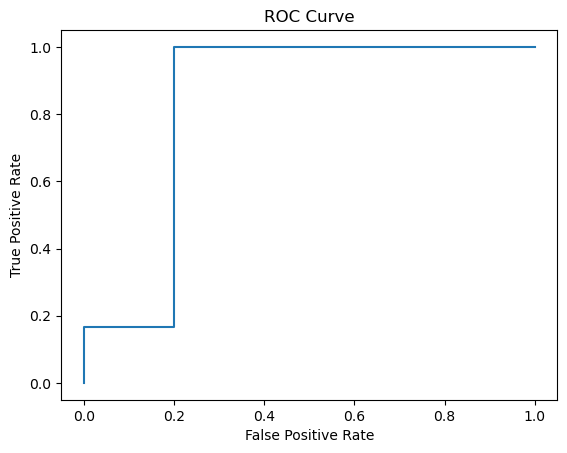

Test Set Accuracy: 0.7272727272727273
AUROC: 0.8333333333333334
Precision: 0.8
Recall: 0.6666666666666666


In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, roc_curve
import matplotlib.pyplot as plt

def build_logistic_regression_model(df):
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    auroc = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    
    return accuracy, auroc, precision, recall

# Example usage:
gene_exp.replace({'GNG':0, 'MBL':1}, inplace = True)
accuracy, auroc, precision, recall = build_logistic_regression_model(gene_exp)
print("Test Set Accuracy:", accuracy)
print("AUROC:", auroc)
print("Precision:", precision)
print("Recall:", recall)